In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df= pd.read_csv("hour.csv")
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [4]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
#Renaming the columns
df1=df.rename(columns={"dteday": "date","yr":"year","mnth":"month","hr":"hour","weathersit":"weather","hum":"humidity","cnt":"count"})

In [6]:
df1.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [7]:
#Changing the datatype of "date" column for extracting "day" column from it.
df1['date']=pd.to_datetime(df1['date'])

In [8]:
df1.insert(5,"day",df1["date"].dt.day)

In [9]:
#converting "date" column into index
df1.set_index('date',inplace=True)

In [10]:
#dropping "instant" column because it is just a type of index
df1.drop("instant",axis=1,inplace=True)

In [11]:
df1.head()

,season,year,month,day,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
date,,,,,,,,,,,,,,,,
2011-01-01,1,0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2011-01-01,1,0,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2011-01-01,1,0,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
2011-01-01,1,0,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
2011-01-01,1,0,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [12]:
#Checking missing values
df1.isnull().any().any()

False

In [13]:
#Mapping of "season" ,"weather","weekday" variables

In [14]:
df1["season"]= df1["season"].map({1:"spring",2:"summer",3:"fall",4:"winter"})
df1["weather"]= df1["weather"].map({1:"clear",2:"mist/cloudy",3:"light/heavy rain/snow"})
df1["weekday"]=df1.index.day_name()

In [15]:
df1.head()

,season,year,month,day,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
date,,,,,,,,,,,,,,,,
2011-01-01,spring,0,1,1,0,0,Saturday,0,clear,0.24,0.2879,0.81,0.0,3,13,16
2011-01-01,spring,0,1,1,1,0,Saturday,0,clear,0.22,0.2727,0.80,0.0,8,32,40
2011-01-01,spring,0,1,1,2,0,Saturday,0,clear,0.22,0.2727,0.80,0.0,5,27,32
2011-01-01,spring,0,1,1,3,0,Saturday,0,clear,0.24,0.2879,0.75,0.0,3,10,13
2011-01-01,spring,0,1,1,4,0,Saturday,0,clear,0.24,0.2879,0.75,0.0,0,1,1


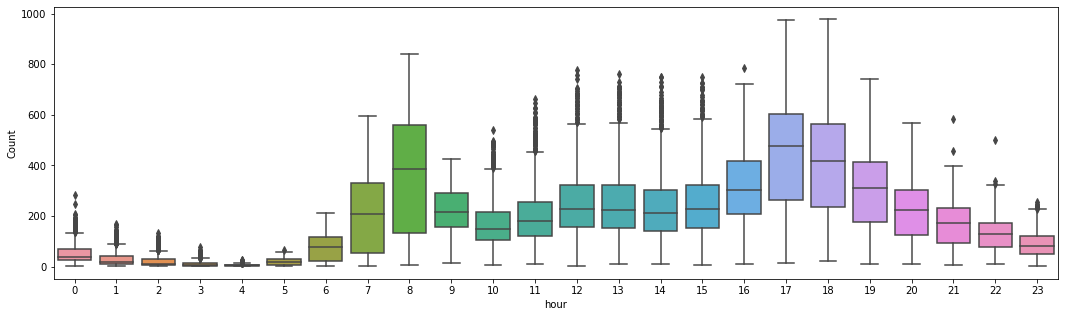

In [16]:
#Checking trend of bike demand over hours.
fig, ax = plt.subplots(figsize=(18, 5))
sns.boxplot(x=df1['hour'], y=df1['count'], ax=ax)
ax.set_ylabel('Count');

Observation:   
• 6 is the hour when the demand for bike starts rising.  
• High : 7-8 and 17-19 hours  
• Average : 9-16 hours  
• Low : 0-5 and 20-23 hours  

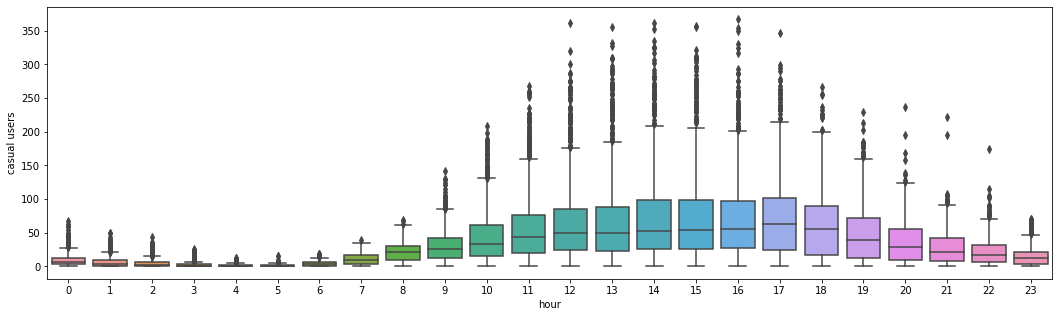

In [17]:
#Checking trend of bike demand of casual user on the basis of "hour".
fig, ax = plt.subplots(figsize=(18, 5))
sns.boxplot(x=df1['hour'], y=df1['casual'], ax=ax)
ax.set_ylabel('casual users');

•Mostly Bikes are rented by Casual users are in Day time hours.

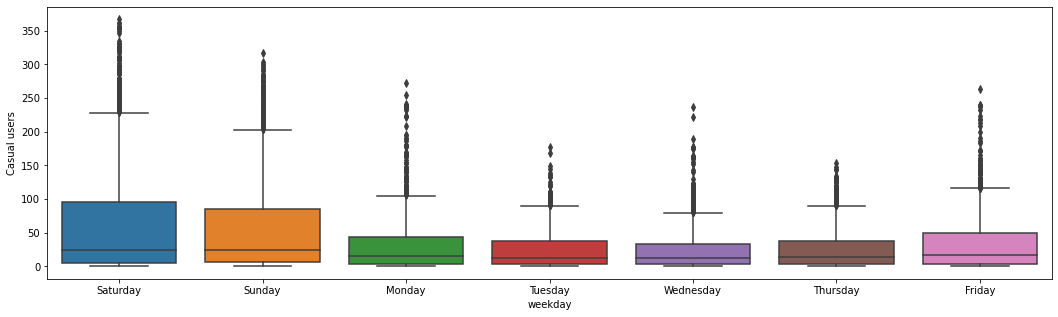

In [18]:
#Checking trend of bike demand of casual user on the basis of "weekday".
fig, ax = plt.subplots(figsize=(18, 5))
sns.boxplot(x=df1['weekday'], y=df1['casual'], ax=ax)
ax.set_ylabel('Casual users');

•Casual users are renting bikes mostly on weekends.

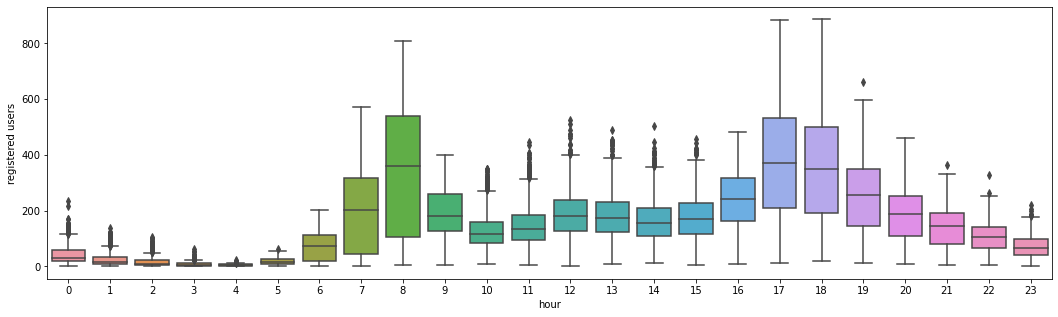

In [19]:
#Checking trend of bike demand over hours of registered users.
fig, ax = plt.subplots(figsize=(18, 5))
sns.boxplot(x=df1['hour'], y=df1['registered'], ax=ax)
ax.set_ylabel('registered users');

•The most active hours of registered users for renting the bikes are 7-8 in morning and 17-18 in the evening.

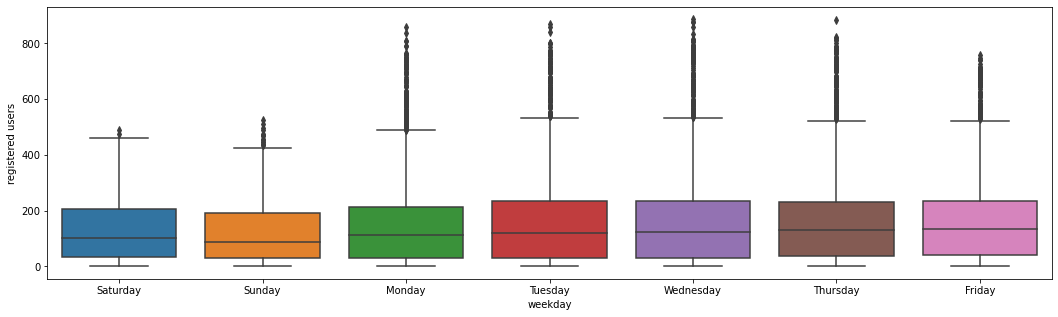

In [20]:
#Checking trend of bike demand of registered user on the basis of "weekday".
fig, ax = plt.subplots(figsize=(18, 5))
sns.boxplot(x=df1['weekday'], y=df1['registered'], ax=ax)
ax.set_ylabel('registered users');

•Registered users are renting bikes on everyday but slightly more on weekdays.

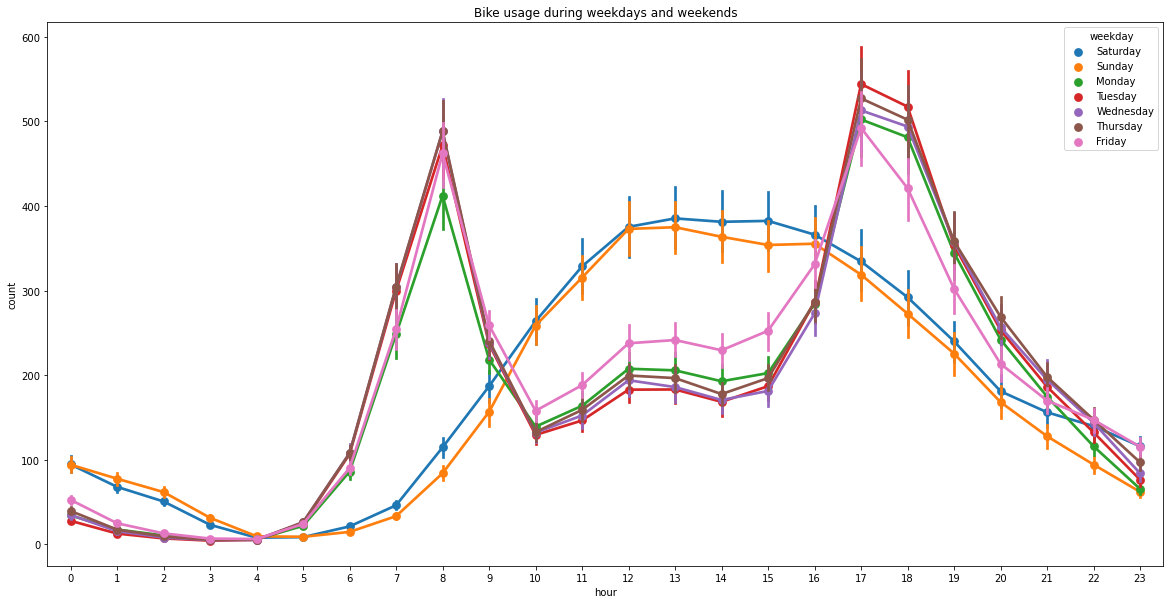

In [21]:
#Checking trend of bike demand over hours on the basis of "weekdays"
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df1[['hour','count','weekday']],
            x='hour', y='count',
            hue='weekday', ax=ax)
ax.set(title="Bike usage during weekdays and weekends");

•Demand for bikes is high in Morning and Evening hours on weekdays.(Mostly by registered users)  
•Demand for bikes is high in Day Time hours on weekends.(Mostly by casual users)  

In [22]:
df1.head()

,season,year,month,day,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
date,,,,,,,,,,,,,,,,
2011-01-01,spring,0,1,1,0,0,Saturday,0,clear,0.24,0.2879,0.81,0.0,3,13,16
2011-01-01,spring,0,1,1,1,0,Saturday,0,clear,0.22,0.2727,0.80,0.0,8,32,40
2011-01-01,spring,0,1,1,2,0,Saturday,0,clear,0.22,0.2727,0.80,0.0,5,27,32
2011-01-01,spring,0,1,1,3,0,Saturday,0,clear,0.24,0.2879,0.75,0.0,3,10,13
2011-01-01,spring,0,1,1,4,0,Saturday,0,clear,0.24,0.2879,0.75,0.0,0,1,1


In [23]:
#Checking the which "weather" has the highest bike rental count
df1.groupby(["weather"])['count'].sum().sort_values(ascending=False)

weather
clear                    2338173
mist/cloudy               795952
light/heavy rain/snow     158331
Name: count, dtype: int64

•Highest number of bikes are rented when "weather" was "clear"   
•Lowest number of bikes are rented when "weather" was "light/heavy rain/snow " 

In [24]:
#Checking the which "season" has the highest bike rental count
df1.groupby(["season"])['count'].sum().sort_values(ascending=False)

season
fall      1061129
summer     918589
winter     841613
spring     471348
Name: count, dtype: int64

•Highest number of bikes are rented in "fall" season.  
•Lowest number of bikes  are rented in "spring" season.

In [25]:
#"holiday variable"
df1.groupby(["holiday"])['count'].sum().sort_values(ascending=False)

holiday
0    3214244
1      78435
Name: count, dtype: int64

•More number of bikes have been rented on non-holiday

In [26]:
#"workingday" variable
df1.groupby(["workingday"])['count'].sum().sort_values(ascending=False)

workingday
1    2292410
0    1000269
Name: count, dtype: int64

•The Bike rental count is more on Working day.

In [27]:
#"year" variable
df1.groupby(["year"])['count'].sum().sort_values(ascending=False)

year
1    2049576
0    1243103
Name: count, dtype: int64

•The year 2012 has more number of rented bikes as compared to year 2011.

In [28]:
df1.columns

Index(['season', 'year', 'month', 'day', 'hour', 'holiday', 'weekday',
       'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'count'],
      dtype='object')

In [29]:
num_var=['month', 'day', 'hour', 'holiday',
       'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'count']

In [30]:
corr=df1[num_var].corr()
corr.style.background_gradient(cmap="PuBu")

,month,day,hour,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count
month,1.000000,0.007929,-0.005772,0.018430,-0.003477,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
day,0.007929,1.000000,0.001538,-0.010132,0.008627,0.027180,0.021269,0.025663,0.010505,-0.003283,-0.004098,-0.004312
hour,-0.005772,0.001538,1.000000,0.000479,0.002285,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.018430,-0.010132,0.000479,1.000000,-0.252471,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
workingday,-0.003477,0.008627,0.002285,-0.252471,1.000000,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
temp,0.201691,0.027180,0.137603,-0.027340,0.055390,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.208096,0.021269,0.133750,-0.030973,0.054667,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929
humidity,0.164411,0.025663,-0.276498,-0.010588,0.015688,-0.069881,-0.051918,1.000000,-0.290105,-0.347028,-0.273933,-0.322911
windspeed,-0.135386,0.010505,0.137252,0.003988,-0.011830,-0.023125,-0.062336,-0.290105,1.000000,0.090287,0.082321,0.093234
casual,0.068457,-0.003283,0.301202,0.031564,-0.300942,0.459616,0.454080,-0.347028,0.090287,1.000000,0.506618,0.694564


•It is clear from the corr matrix that the independent variables Temp and atemp are highly correlated.  
•If both features are included in the model, this will cause the issue of Multicollinearity. Hence we have to drop either temp or atemp .

In [31]:
#here dropping "atemp"
df1.drop("atemp",axis=1,inplace=True)

In [32]:
df1=pd.get_dummies(df1,drop_first=True)

In [33]:
df1.head()

,year,month,day,hour,holiday,workingday,temp,humidity,windspeed,casual,registered,count,season_spring,season_summer,season_winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weather_light/heavy rain/snow,weather_mist/cloudy
date,,,,,,,,,,,,,,,,,,,,,,,
2011-01-01,0,1,1,0,0,0,0.24,0.81,0.0,3,13,16,1,0,0,0,1,0,0,0,0,0,0
2011-01-01,0,1,1,1,0,0,0.22,0.80,0.0,8,32,40,1,0,0,0,1,0,0,0,0,0,0
2011-01-01,0,1,1,2,0,0,0.22,0.80,0.0,5,27,32,1,0,0,0,1,0,0,0,0,0,0
2011-01-01,0,1,1,3,0,0,0.24,0.75,0.0,3,10,13,1,0,0,0,1,0,0,0,0,0,0
2011-01-01,0,1,1,4,0,0,0.24,0.75,0.0,0,1,1,1,0,0,0,1,0,0,0,0,0,0


In [34]:
df1.shape

(17379, 23)

# Train Test Split

In [35]:
X = df1.drop(["casual","registered","count"], axis=1)
y = df1['count']

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=18)
print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (13903, 20)
Shape of y_train =  (13903,)
Shape of X_test =  (3476, 20)
Shape of y_test =  (3476,)


# Machine Learning

# Random Forest

In [37]:
from sklearn.ensemble  import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators =350, max_features = 'auto')
new=rfr.fit(X_train,y_train)
rfr_score=rfr.score(X_test,y_test)
print("Training Accuracy:",rfr.score(X_train,y_train))
print("Testing Accuracy:",rfr_score)

Training Accuracy: 0.9923458641542435
Testing Accuracy: 0.9436606010139567


In [38]:
predictions= rfr.predict(X_test)

In [39]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 25.854868485944436
MSE: 1818.523597799488
RMSE: 42.6441508040609


In [40]:
from sklearn.metrics import r2_score
r2_score(y_test, predictions)

0.9436606010139567

In [41]:
from sklearn.model_selection import cross_val_score
cvs_rfr2 = cross_val_score(RandomForestRegressor(), X_train,y_train, cv = 10)
cvs_rfr2, cvs_rfr2.mean()

(array([0.93214823, 0.94848279, 0.93597795, 0.942192  , 0.94860596,
        0.9495417 , 0.94195504, 0.92795979, 0.9464387 , 0.94536087]),
 0.9418663034126282)

In [42]:
from sklearn.model_selection import cross_val_score
cvs_rfr2 = cross_val_score(RandomForestRegressor(), X_test,y_test, cv = 10)
cvs_rfr2, cvs_rfr2.mean()

(array([0.91375717, 0.8771175 , 0.89270302, 0.89537521, 0.8896901 ,
        0.9078537 , 0.85435563, 0.92352875, 0.90102299, 0.86395728]),
 0.891936137091071)

# Linear Regression 

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
 
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_test, y_pred))
 
lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test) 
lr_rmse = rmse(y_test, lr.predict(X_test))
lr_score, lr_rmse

(0.3965868360893806, 139.55993413957978)

# Decision Tree

In [44]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
new=dt.fit(X_train,y_train)
dt_score=dt.score(X_test,y_test)
print("Training Accuracy:",dt.score(X_train,y_train))
print("Testing Accuracy:",dt_score)

Training Accuracy: 1.0
Testing Accuracy: 0.8914309328865647


In [45]:
dt_pred= dt.predict(X_test)

In [46]:
r2_score(y_test, dt_pred)

0.8914309328865647

In [47]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, dt_pred))
print('MSE:', metrics.mean_squared_error(y_test, dt_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dt_pred)))

MAE: 34.85817031070196
MSE: 3504.393268124281
RMSE: 59.19791607923611


In [48]:
from sklearn.model_selection import cross_val_score
cvs_rfr2 = cross_val_score(DecisionTreeRegressor(), X_train,y_train, cv = 10)
cvs_rfr2, cvs_rfr2.mean()

(array([0.87776936, 0.90577348, 0.87609639, 0.86749126, 0.90164178,
        0.89172784, 0.89837547, 0.86326797, 0.87030792, 0.89159296]),
 0.8844044434784394)

In [49]:
from sklearn.model_selection import cross_val_score
cvs_rfr2 = cross_val_score(DecisionTreeRegressor(), X_test,y_test, cv = 10)
cvs_rfr2, cvs_rfr2.mean()

(array([0.84909965, 0.77973622, 0.78463077, 0.81723336, 0.80021535,
        0.82340753, 0.71540692, 0.83237388, 0.81148089, 0.75077123]),
 0.7964355811802447)

# KNN

In [50]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
new=knn.fit(X_train,y_train)
knn_score=knn.score(X_test,y_test)
print("Training Accuracy:",knn.score(X_train,y_train))
print("Testing Accuracy:",knn_score)

Training Accuracy: 0.9094492318375055
Testing Accuracy: 0.8472652342736343


# SVM

In [51]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train,y_train)
svr_score=svr.score(X_test,y_test) 
print("Training Accuracy:",svr.score(X_train,y_train))
print("Testing Accuracy:",svr_score)

Training Accuracy: 0.249776235978299
Testing Accuracy: 0.2594818486257747


# XGB

In [52]:
import xgboost
xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train,y_train)
xgb_reg_score=xgb_reg.score(X_test,y_test) 
print("Training Accuracy:",xgb_reg.score(X_train,y_train))
print("Testing Accuracy:",xgb_reg_score)

Training Accuracy: 0.9779724146532693
Testing Accuracy: 0.9478959596708884


In [53]:
xg_pred= xgb_reg.predict(X_test)

In [54]:
r2_score(y_test, xg_pred)

0.9478959596708884

In [55]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, xg_pred))
print('MSE:', metrics.mean_squared_error(y_test,xg_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, xg_pred)))

MAE: 25.434936151487197
MSE: 1681.814655187541
RMSE: 41.00993361598554


In [56]:
from sklearn.model_selection import cross_val_score
cvs_rfr2 = cross_val_score(xgboost.XGBRegressor(), X_train,y_train, cv = 10)
cvs_rfr2, cvs_rfr2.mean()

(array([0.94462378, 0.95425533, 0.94330097, 0.95277117, 0.95227694,
        0.95255109, 0.94769798, 0.94259609, 0.95134036, 0.95311343]),
 0.9494527130843082)

In [57]:
from sklearn.model_selection import cross_val_score
cvs_rfr2 = cross_val_score(xgboost.XGBRegressor(), X_test,y_test, cv = 10)
cvs_rfr2, cvs_rfr2.mean()

(array([0.92492835, 0.91952758, 0.92015318, 0.93138735, 0.93286346,
        0.93247848, 0.86374139, 0.92506431, 0.93381951, 0.90144132]),
 0.9185404936640081)

In [58]:
#Checking which algorithm is giving highest accuracy
print(pd.DataFrame([{'Model': 'Random Forest','Score':rfr_score},
              {'Model': 'Linear regression','Score':lr_score},
              {'Model': 'Decision Tree','Score':dt_score},
              {'Model': 'KNN','Score':knn_score},
              {'Model': 'SVM','Score':svr_score},
              {'Model': 'XGBoost','Score':xgb_reg_score}],
             columns=['Model','Score']))

               Model     Score
0      Random Forest  0.943661
1  Linear regression  0.396587
2      Decision Tree  0.891431
3                KNN  0.847265
4                SVM  0.259482
5            XGBoost  0.947896


•Random Forest and XG Boost are giving the highest accuracy.  
•Random Forest: 94.3%  
•XG Boost: 94.7%